In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [89]:
data = pd.read_csv("/kaggle/input/shipment-price/raw.csv")

In [90]:
df = data.copy()

In [91]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


## Feature Engineering

In [92]:
## Absoluting Target featue
df["Cost"] = df["Cost"].abs()

In [93]:
df["Cost"]

0        283.29
1        159.96
2        154.29
3        161.16
4        159.23
         ...   
6495     872.43
6496    1347.02
6497     354.55
6498    5037.50
6499     722.47
Name: Cost, Length: 6500, dtype: float64

##### Extracting month and year

In [94]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [95]:
df["year"] = pd.DatetimeIndex(df["Scheduled Date"]).year
df["month"] = pd.DatetimeIndex(df["Scheduled Date"]).month

In [96]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",159.23,2016,12


##### Dropping unnecessary features

In [97]:
df = df.drop(["Customer Id","Artist Name","Scheduled Date","Delivery Date","Customer Location"],axis =1)

In [98]:
df.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,year,month
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,283.29,2015,6
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,159.96,2017,3
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,154.29,2015,3
3,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,161.16,2015,5
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,159.23,2016,12


##### Handling missing values

In [99]:
df.isnull().sum()

Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Cost                        0
year                        0
month                       0
dtype: int64

In [100]:
target_feature = "Cost"

## Separating categorical and numerical feature
numeric_features = []
non_numeric_features = []

for column in df.columns:
    if df[column].dtype == "O":
        non_numeric_features.append(column)
    else:
        numeric_features.append(column)

In [101]:
numeric_features.remove(target_feature)

In [102]:
print(f"We have {len(numeric_features)} numerical features :", numeric_features)
print(f"We have {len(non_numeric_features)} categorical features :",non_numeric_features)

We have 8 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'year', 'month']
We have 8 categorical features : ['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location']


##### Imputing missing values with median to check multicollinearity

In [103]:
df1 = df.copy()

In [104]:
for column in numeric_features:
    df1[column].fillna(df1[column].median(),inplace =True)

In [105]:
### Check for multicollinearity using Variance Inflation Factor(VIF)

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [106]:
import statsmodels.api as sm

for i in range(0, len(numeric_features)):
    x = df1.loc[:, df1.columns == numeric_features[i]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            numeric_features[i], vif)
        )


Variance Inflation Factor of Artist Reputation column is 1.01 

Variance Inflation Factor of Height column is 1.01 

Variance Inflation Factor of Width column is 1.02 

Variance Inflation Factor of Weight column is 1.22 

Variance Inflation Factor of Price Of Sculpture column is 1.33 

Variance Inflation Factor of Base Shipping Price column is 1.01 

Variance Inflation Factor of year column is 0.03 

Variance Inflation Factor of month column is 1.0 



#### Variance Inflation Factor for all numeric features is around 1.

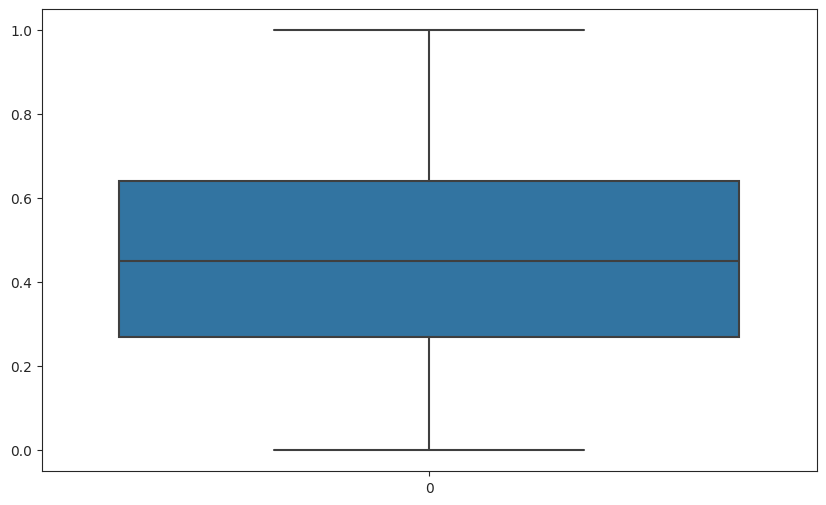

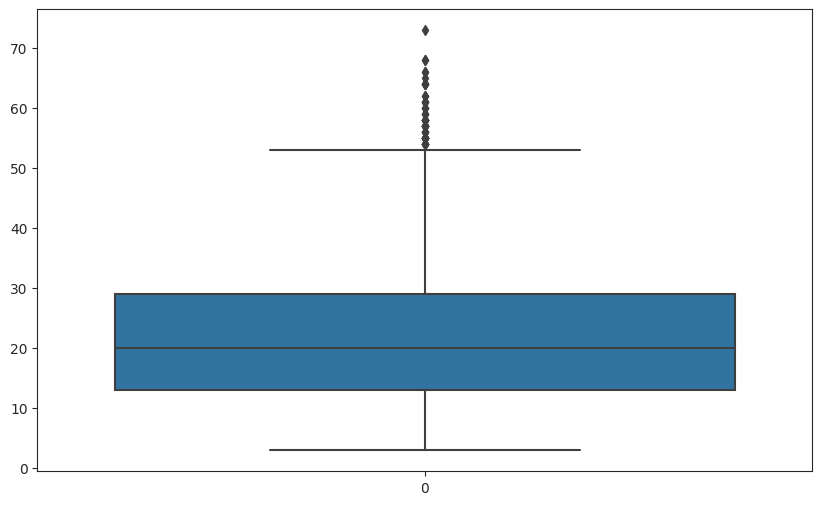

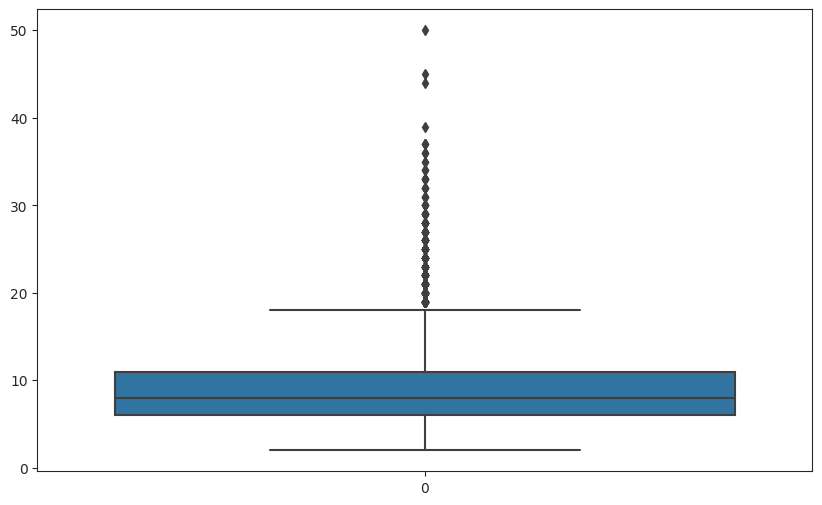

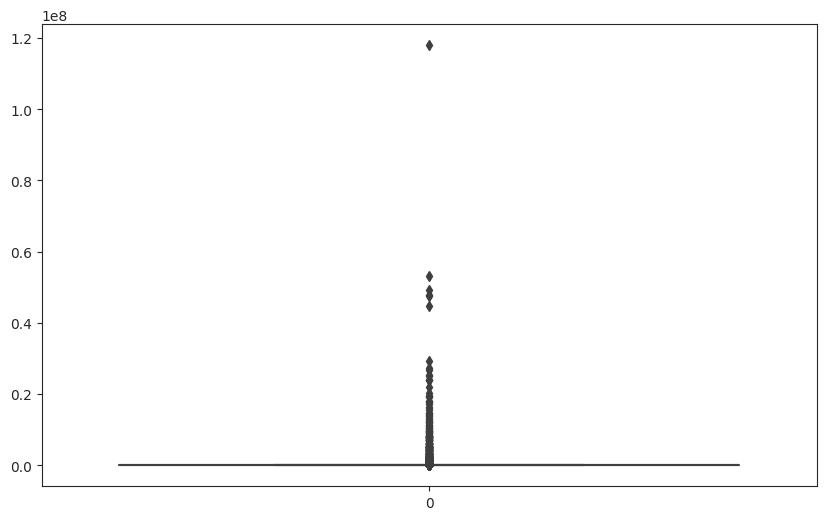

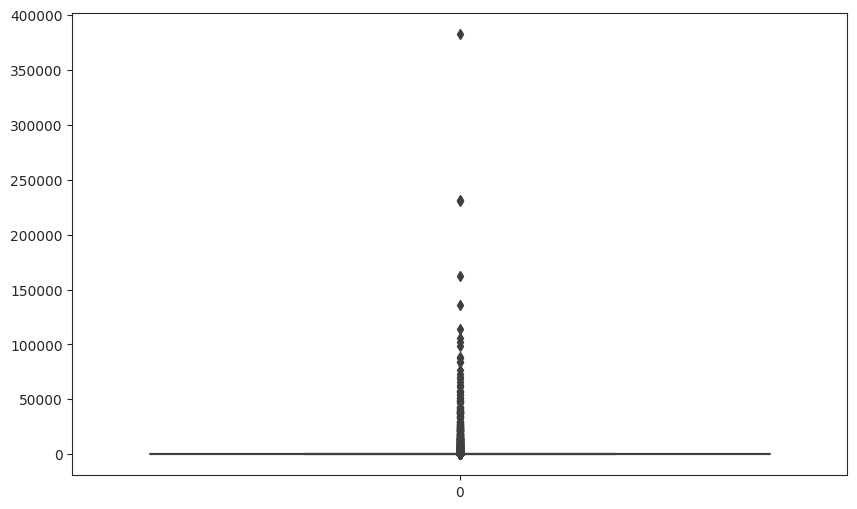

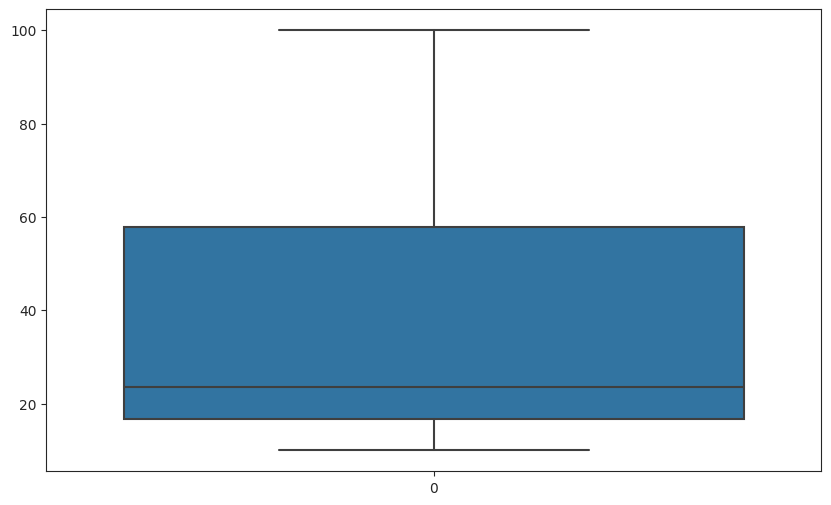

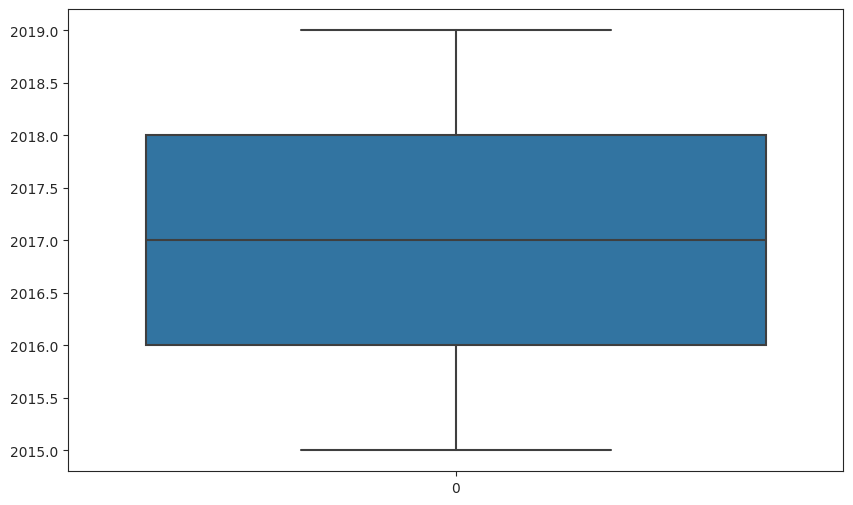

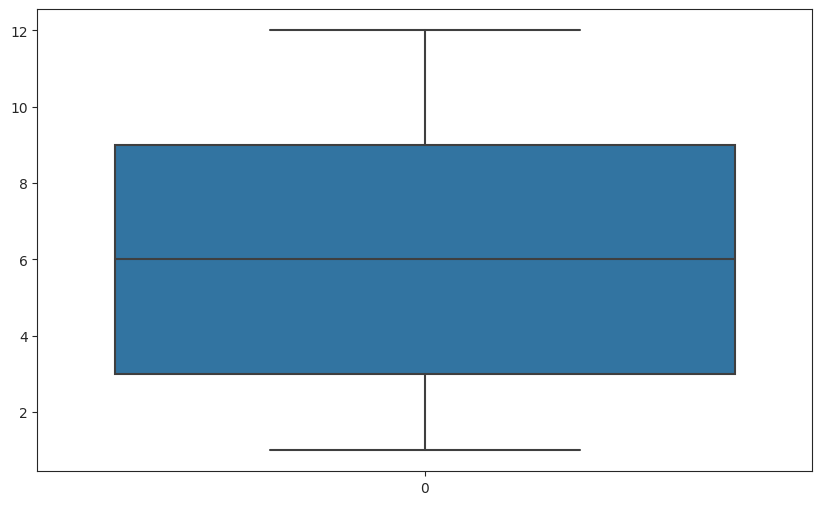

In [107]:
for i in numeric_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df1[i])

Height, Width, Weight, Price of Sculpture contains outliers.

In [108]:
## Checking for skewness
df[numeric_features].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
year                    0.104104
month                   0.112461
dtype: float64

It is clearly visible that Weight and Price of Sculpture are highly skewed.

By applying transformations can handle this.

In [109]:
skewed_feature = ["Price Of Sculpture","Weight"]

In [110]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize = False)

In [111]:
skewed_data = df1[skewed_feature]

In [112]:
df1[skewed_feature] = pt.fit_transform(df1[skewed_feature])

In [113]:
df_outlier = pd.DataFrame(skewed_data ,columns=skewed_feature)

In [114]:
df1[skewed_feature].skew()

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

#### Handling outliers of target feature

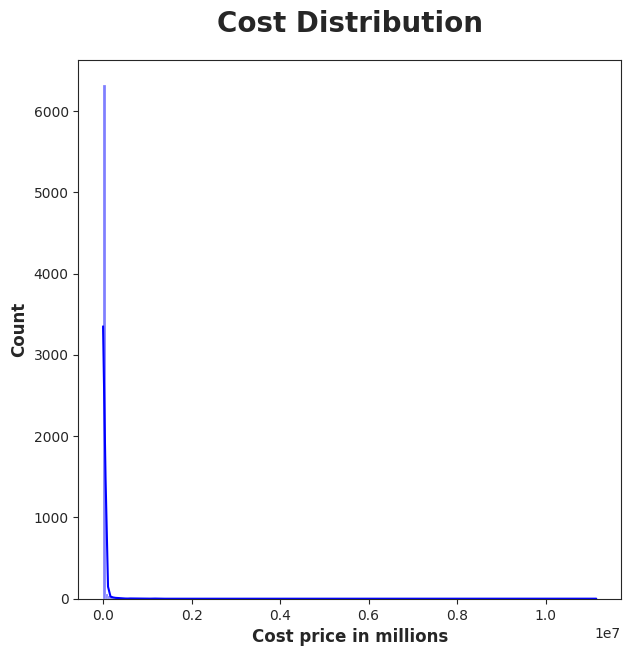

In [115]:
plt.subplots(figsize=(7,7))
sns.histplot(df['Cost'], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.show()

In [116]:
df1[target_feature] = np.log1p(df1[target_feature]) 

(array([2210., 2207., 1046.,  520.,  244.,  143.,   73.,   35.,   16.,
           6.]),
 array([ 4.46671239,  5.64267721,  6.81864203,  7.99460685,  9.17057167,
        10.34653649, 11.5225013 , 12.69846612, 13.87443094, 15.05039576,
        16.22636058]),
 <BarContainer object of 10 artists>)

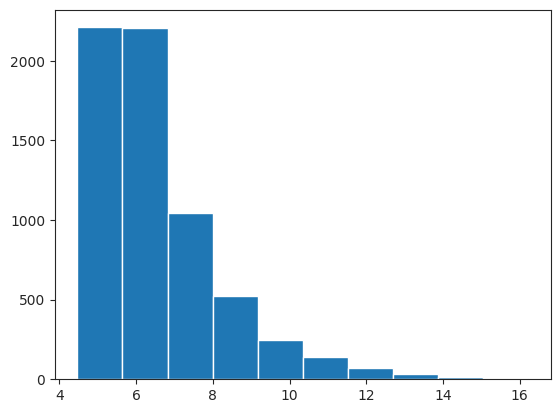

In [117]:
plt.hist(df1[target_feature])

Data looks good after the log transformation but not Normally distributed.

## Model Training

In [118]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [119]:
X = df.drop("Cost",axis =1)
y = np.abs(df["Cost"])

In [120]:
y = np.log1p(y)

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [122]:
numeric_features = [x for x in numeric_features if x not in skewed_feature]
non_numeric_features = [x for x in non_numeric_features]

(numeric_features), (non_numeric_features), (skewed_feature)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'year',
  'month'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

* **Mean imputer:** Since we handeled outlier by powertransformer for the continuous features the mean and median of the features are nearly same. When there are no outliers mean performs an a better imputer.
* **Standardscaler:** As the features distribution are nearly normal we use standard scaler.

In [123]:
numeric_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

non_numeric_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder()),
]
)

skewed_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(standardize=True))
])

preprocessor = ColumnTransformer(
    [
        ("Numeric Pipeline",numeric_features_pipeline, numeric_features),
        ("Categorical Features Pipeline",non_numeric_features_pipeline, non_numeric_features),
        ("Outliers Features Pipeline", skewed_features_pipeline, skewed_feature)
]
)

In [124]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Model Selection
* **Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning**

In [125]:
# functions which takes true and predicted values to calculate metrics
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [126]:
# function which can evaluate models and return a report 
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''    
    models_list = []
    r2_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_reg(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate_reg(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)
        
    return report

In [131]:
# Initialize models required for model
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoost Regressor": CatBoostRegressor(verbose=False, max_depth=5),
    "AdaBoost Regressor": AdaBoostRegressor(), 
    "SVR": SVR()
}

In [128]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7357
- Mean Absolute Error: 0.4971
- R2 Score: 0.8014
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6966
- Mean Absolute Error: 0.4841
- R2 Score: 0.8218


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5675
- Mean Absolute Error: 0.3614
- R2 Score: 0.8818
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6588
- Mean Absolute Error: 0.4263
- R2 Score: 0.8406


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5236
- Mean Absolute Error: 0.3304
- R2 Score: 0.8993


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1241
- Mean Absolute Error: 0.0791
- R2 Score: 0.99

In [129]:
base_report

,Model Name,r2_score
5,CatBoosting Regressor,0.972231
4,XGBRegressor,0.963610
3,Random Forest Regressor,0.955150
7,SVR,0.913033
2,Decision Tree,0.899277
6,AdaBoost Regressor,0.858650
1,K-Neighbors Regressor,0.840555
0,Linear Regression,0.821773


In [132]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01, 0.6, 0.5],
              "max_depth": [4, 5, 6, 8, 12]}

In [133]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                   ('CatBoost', CatBoostRegressor(verbose=False), cat_params)
                   ]

In [134]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
---------------- Best Params for CatBoost -------------------
{'max_depth': 5, 'learning_rate': 0.1}


In [135]:
# reInitialize models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'], n_jobs=-1), 
     "CatBoost Regressor": CatBoostRegressor(**model_param['CatBoost'],verbose=False)
}

In [136]:
retrained_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1218
- Mean Absolute Error: 0.0777
- R2 Score: 0.9946
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3454
- Mean Absolute Error: 0.2031
- R2 Score: 0.9562


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1527
- Mean Absolute Error: 0.0979
- R2 Score: 0.9914
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2921
- Mean Absolute Error: 0.1707
- R2 Score: 0.9687


CatBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1466
- Mean Absolute Error: 0.0962
- R2 Score: 0.9921
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2775
- Mean Absolute Error: 0.1609
- R2 Score: 0.9717




In [137]:
retrained_report

,Model Name,r2_score
2,CatBoost Regressor,0.971714
1,XGBRegressor,0.968658
0,Random Forest Regressor,0.956165


## **CatBoost Regressor is the best model among all with score of 97.17.**